In [70]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
    
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

# Упражнение 1
В примере с утечкой замените окно Хэмминга одним из окон, представляемых в NumPY, и посмотрите как они справляются с утечкой.


In [71]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

Исходный спектр:

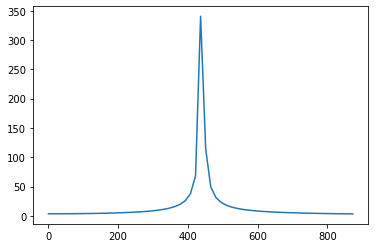

In [72]:
spectrum.plot(high=880)

Окно Хэмминга:



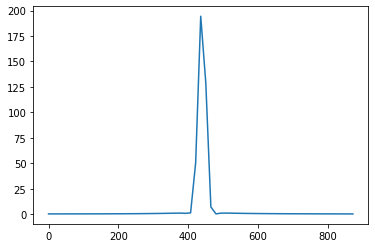

In [73]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)

Окно Блэкмана:

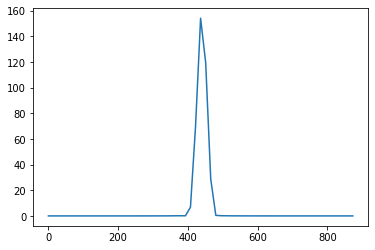

In [74]:
wave = signal.make_wave(duration)
wave.ys *= np.blackman(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880)

Как видим оба окна справляются со своей задачей примерно одинаково.

# Упражнение 2
Напишите класс, называемый SawtoothChirp, расширяющий Chirp и переопределяющий evaluate для генерации пилообразного сигнала с линейно увеличивающейся (или уменьшающейся) частотой.

In [75]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

class SawtoothChirp(Chirp):

    def evaluate(self, ts):
        
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

Срздадим чирп:

In [76]:
signal = SawtoothChirp(start = 660, end = 1320)
wave = signal.make_wave(duration=1, framerate=4000)
wave.make_audio()

Слышим очевидные биения, которые чуть ли не перекрывают основной увиличивающийся звук.
Посмотрим на спектрограмму:

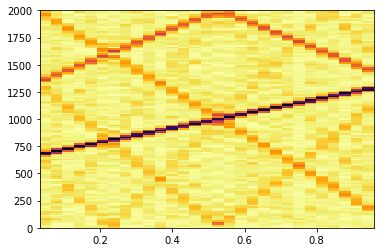

In [77]:
sp = wave.make_spectrogram(256)
sp.plot()

Видим нашу основную частоту - черная линейно меняющая частота. И много дополнительных частот, которые были слышны в аудиозаписи.

---



# Упражнение 3
Создайте пилообразный чирп, меняющийся от 2500 до 3000 Гц, и на его основе сгенерируйте сигнал длительность 1 с и частотой кадров 20 кГц. Проанализируйте Spectrum.

In [78]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

Аудио похоже на звуки игры из 8-битной приставки

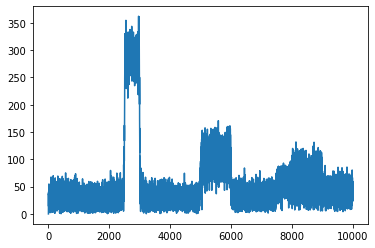

In [79]:
wave.make_spectrum().plot()

Видим, что гармоники накладываются друг на друга, и заметно что на частоте 2500 появляется возвышенность и на частоте около 5000 тоже. Это связано с тем, что в данном диапозоне равное изменение частоты занимает равное время.

# Упражнение 4
В музыкальной терминологии глиссандо - это нота, меняющайся от одной высоты до другой, то есть своеобразный чирп.
Найдите или запишите звук глиссандо и распичатайте спектрограмму первых нескольких секунд.

In [80]:
if not os.path.exists('synth_gliss.wav'):
    !wget https://github.com/donebd/telecom_spbstu2022/raw/main/res/lab3/synth_gliss.wav
    
from thinkdsp import read_wave
wave = read_wave('synth_gliss.wav')
wave.make_audio()

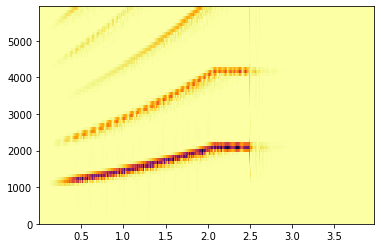

In [81]:
wave.make_spectrogram(512).plot(high=6000)

Это действительно похоже на наш чирп.

# Упажнение 5
Тромбонист играет глиссандо, непрерывно дуя в мундштук и двигая кулису тромбона. При этом общая дина трубы меняется, а играемая нота обратно пропорциональна этой длине.<br>
Если предположить, что музыкант двигает кулису с постоянной скоростью, как будет меняться во времени частота?<br>
Напишите класс, называемый ThromboneGliss, расширяющий Chirp и предоставляющий evalaute. Создайте сигнал, имитирующий глиссандо на тромбоне от C3 до F3, и обратно до C3. C3 - 262 Гц; F3 - 349 Гц.

Если музыкант двигает кулису с постоянной скоростью, то он линейно будет менять частоту, соответсвенно звук будет меняться логарифмически.

In [82]:
class TromboneGliss(Chirp):

    
    def evaluate(self, ts):
        lengths = np.linspace(1.0 / self.start, 1.0 / self.end, len(ts))
        freqs = 1 / lengths
        dts = np.diff(ts, prepend=0)
        dphis = np.pi * 2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [83]:
signal1 = TromboneGliss(262, 349)
wave1 = signal1.make_wave(duration=1)
wave1.make_audio()

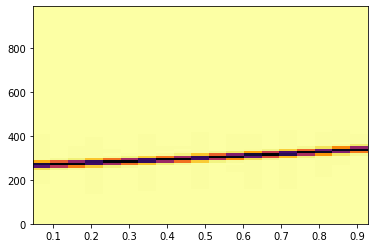

In [84]:
sp = wave1.make_spectrogram(1024)
sp.plot(high=1000)

In [85]:
signal2 = TromboneGliss(349, 262)
wave2 = signal2.make_wave(duration=1)
wave2.make_audio()

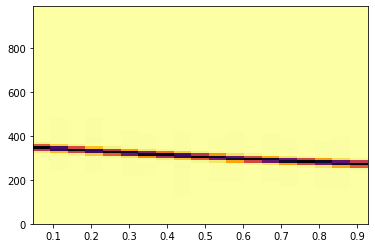

In [86]:
sp = wave2.make_spectrogram(1024)
sp.plot(high=1000)

In [87]:
result = wave1 | wave2
result.make_audio()

Получилось нужное глиссандо)

# Упражнение 6
Сделайте или найдите запись серии гласных звуков, посмотрите на спектрограмму. Сможете ли вы различать разные гласные?

Запись звуков была записана при помощи гугл переводчика))

In [88]:
if not os.path.exists('Letters.wav'):
    !wget https://github.com/donebd/telecom_spbstu2022/raw/main/res/lab3/Letters.wav
wave = read_wave('Letters.wav')
wave.make_audio()

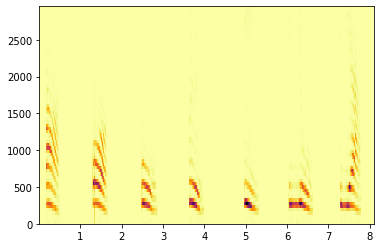

In [89]:
wave.make_spectrogram(1000).plot(3000)

Вообщем то гласные буквы можно различать по спектограмме, если знать какой паттерн принадлежин конкретной букве.